# TSLA
Tesla Inc. is an American electric vehicle and clean energy company based in Palo Alto, California. Tesla designs, manufactures, and sells electric vehicles, battery energy storage systems, solar panels, and solar roof tiles. 

The company was founded in 2003 by engineers Martin Eberhard and Marc Tarpenning. Elon Musk joined the company as chairman of the board of directors after leading Tesla's initial round of investment funding in February 2004.

## Settings

In [12]:
# Root Settings
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path().resolve().parent))

# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance import (
    get_facts,
    annual_net_income, plot_annual_net_income, plot_net_income_growth,
    annual_dividends, plot_annual_dividends, plot_dividends_growth,
    historical_price
)

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [13]:
ticker = 'TSLA'
facts = get_facts(ticker=ticker)

## Income

Tesla kept net loss until 2020, when it reported a net income of $721 million. The company has been profitable since then, with net income reaching $14.9 billion in 2023. 

But the growth has slowed down. In 2024, Tesla's net income has decreasd to $7.1 billion, a 52% decrease compared to the previous year.

In [21]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(5)

,date,net_income,year
11,2020-12-31,721000000,2020
12,2021-12-31,5519000000,2021
13,2022-12-31,12556000000,2022
14,2023-12-31,14997000000,2023
15,2024-12-31,7091000000,2024


## Income Growth (%)

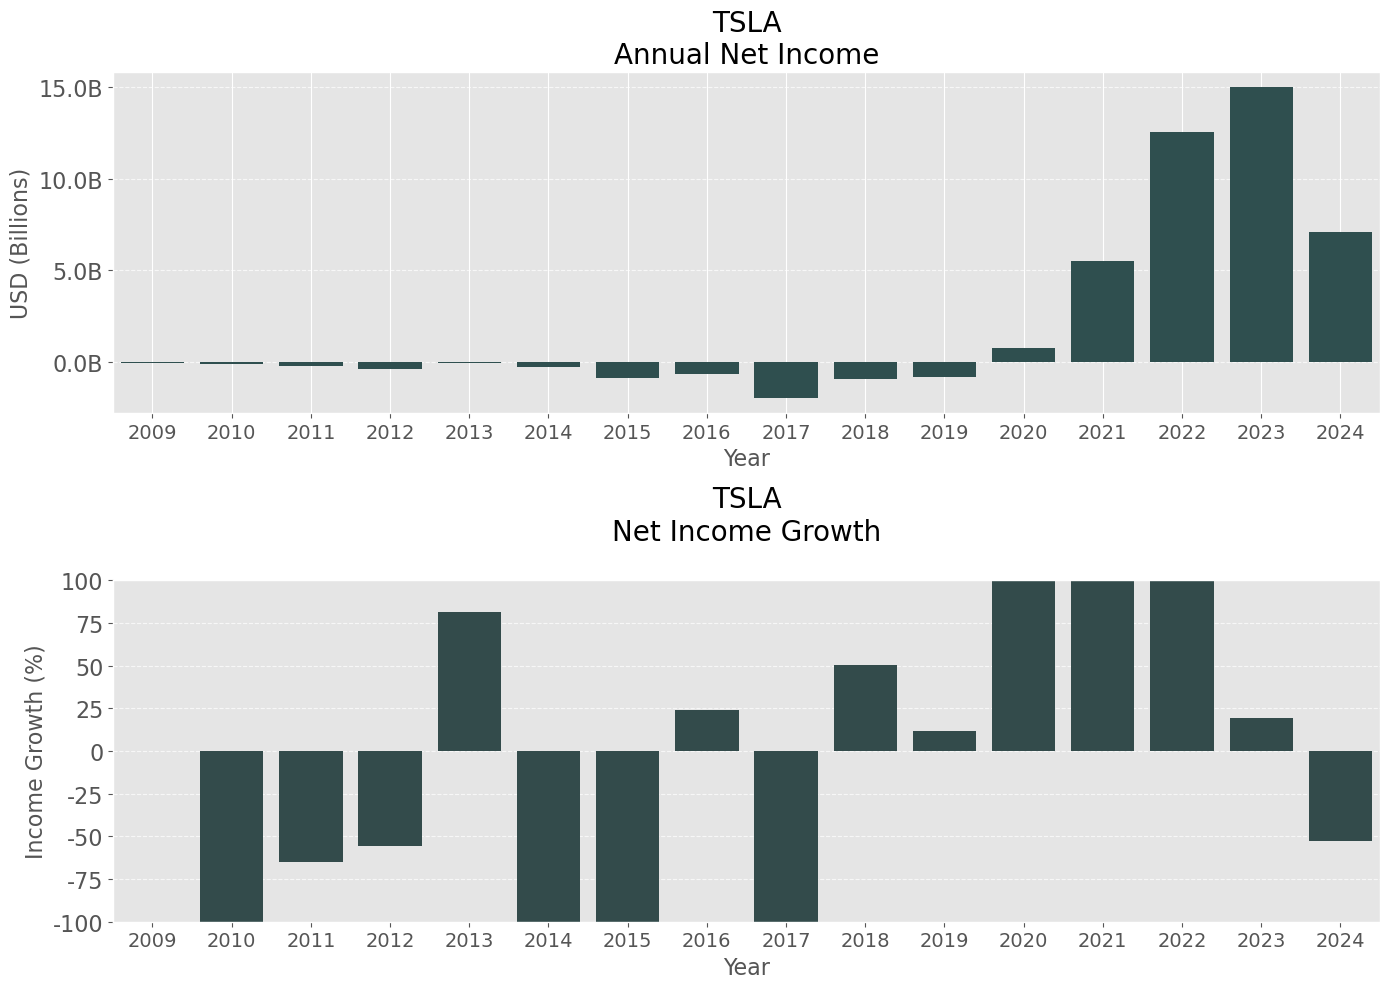

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=50e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-100, ymax=100, ystep=25, ax=axes[1])

# Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

## Price

Since the net income of 2024 has reverted back to the level of 2021, the stock price can be expected to revert back to the level of 2021 as well. And the stock price has indeed reverted back to $250 to $300, which is the price level of 2021.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


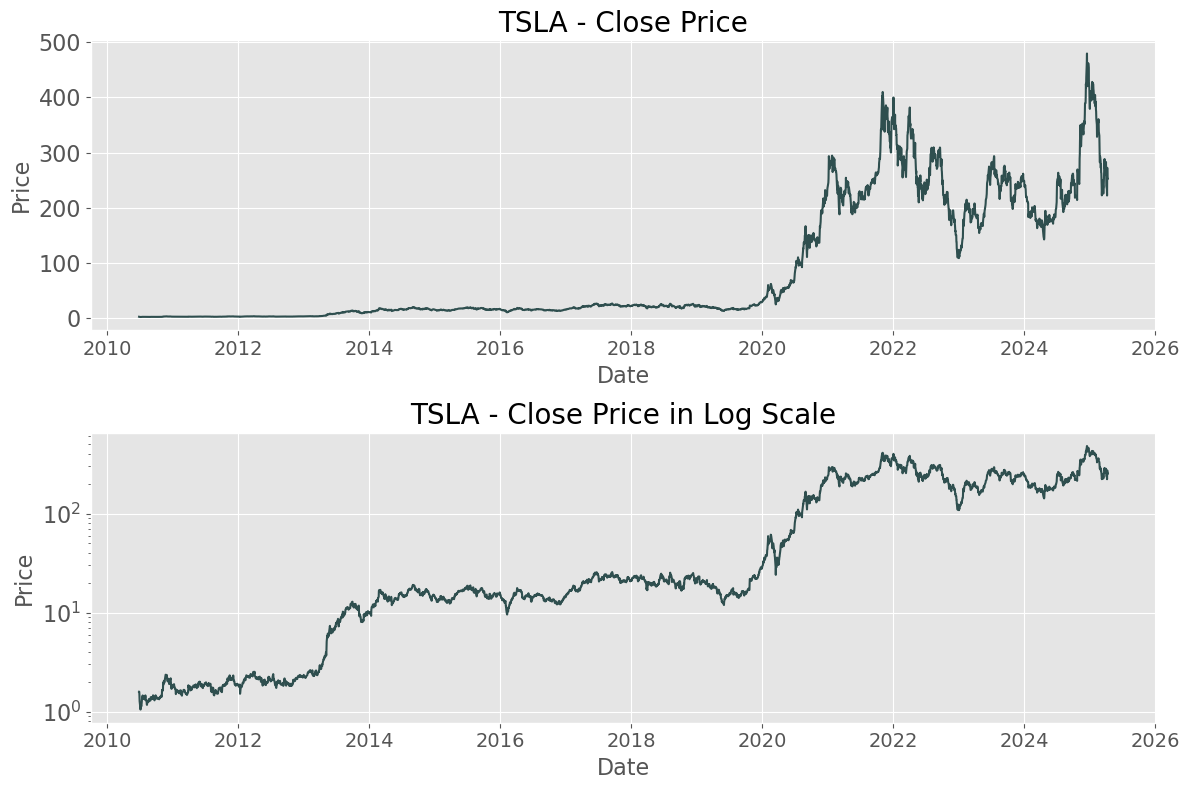

In [16]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()


## Dividends

> *"Do you know the only thing that gives me pleasure? It's to see my dividends coming in."*  
> 
> *John D. Rockefeller, 1901*

In [17]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

""


[TSLA] No dividend data available. Skipping annual dividend plot.
[TSLA] No dividend data available. Skipping dividends growth plot.


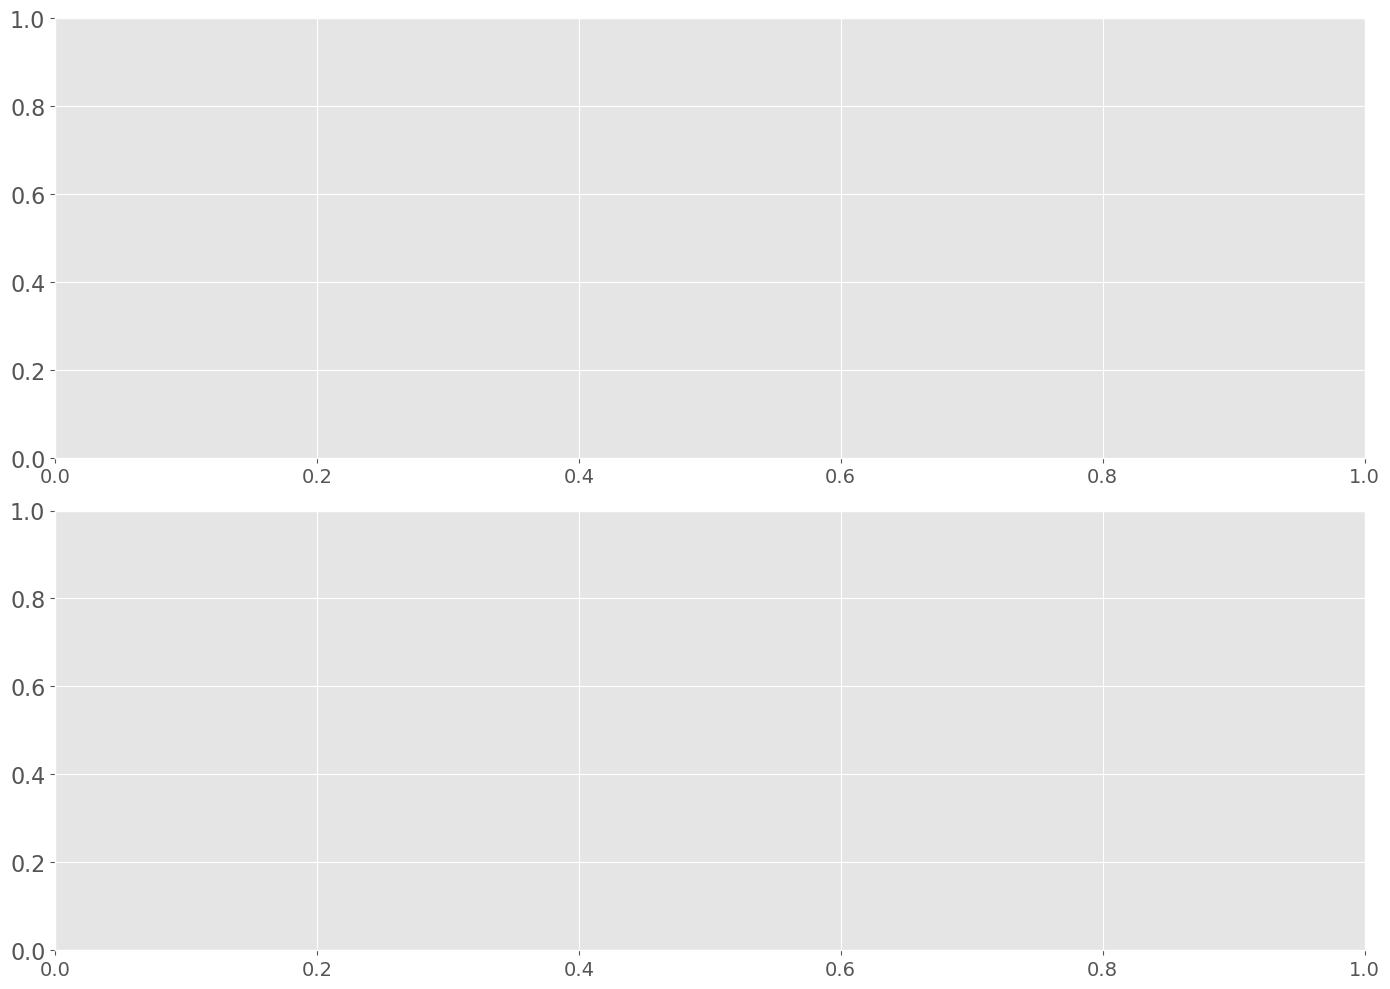

In [18]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=-10, ymax=10, ystep=5, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

## P/E Ratio

P/E ratio has skyrocketed over 100 recently. When I bought Tesla in ealry 2024, the annual net income of Teslas was $14.9 billion and the stock price was under $200. P/E ratio was cheap at that time.

Now, the stock price has increased to $250 when the annual net income has decreased to $7.1 billion. 

In [19]:
price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share
pe = (market_cap.iloc[-1] / df_net_income[0].net_income.iloc[-1]).iloc[0]

print(f"Latest P/E Ratio for {ticker}: {pe:.2f}")

[*********************100%***********************]  1 of 1 completed


Latest P/E Ratio for TSLA: 114.45


[*********************100%***********************]  1 of 1 completed


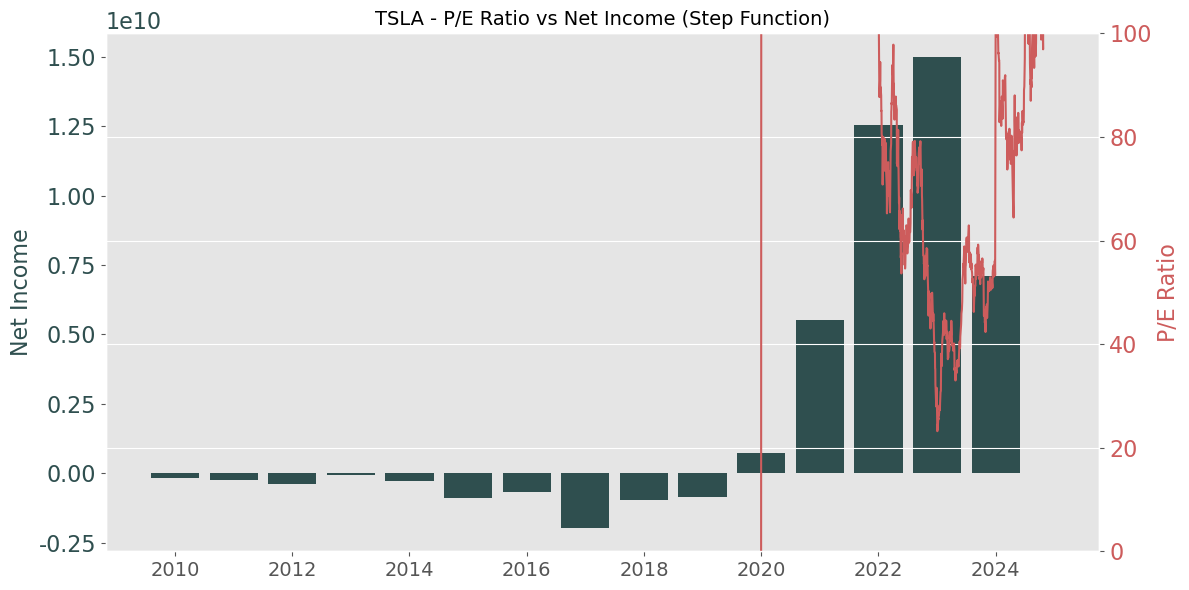

In [20]:
import yfinance as yf

price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share

df = df_net_income[0].copy()
df = df[df['year'] >= market_cap.index.min().year]
df['effective_date'] = pd.to_datetime(df['year'], format='%Y')  # Jan 1 of next year

# Daily P/E Ratio using step function for annual income
step_dates = pd.to_datetime(df['date'])
step_income = df.set_index('date')['net_income']

# Create step series aligned with price_df
pe_df = market_cap.copy()
pe_df['year'] = pe_df.index.year
pe_df['net_income'] = pe_df['year'].map(df.set_index('year')['net_income'])
pe_df['pe'] = pe_df[ticker] / pe_df['net_income']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Net Income (right y-axis)
ax1.bar(df['effective_date'], df['net_income'], width=300, color='darkslategray')
ax1.set_ylabel('Net Income', color='darkslategray')
ax1.tick_params(axis='y', labelcolor='darkslategray')
ax1.grid(False)

# P/E Ratio (left y-axis)
ax2 = ax1.twinx()
ax2.plot(pe_df.index, pe_df['pe'], color='indianred', label='P/E Ratio')
ax2.set_ylabel('P/E Ratio', color='indianred')
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelcolor='indianred')

# Title and x-label
plt.title(f'{ticker} - P/E Ratio vs Net Income (Step Function)', fontsize=14)
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Conclusion

**SELL**

Tesla was a good investment in early 2024. But now, the stock price has increased to $250 when the annual net income has decreased to $7.1 billion. The P/E ratio is over 100 now.

The stock price is too high now. I will sell my Tesla stocks and invest in other companies with lower P/E ratios.